# Simple Linear Regression

## Dataset
Penguin dataset is available with seaborn library and serves as replacement/alternate for iris dataset. This datasets contain data for 344 penguins. There are 3 different species of penguins in this dataset, collected from 3 islands in the Palmer Archipelago, Antarctica.

In [1]:
# imports
import pandas as pd
import seaborn as sns

In [2]:
# Load dataset
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [4]:
penguins.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [6]:
penguins.describe()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


## Missing Values 

In [26]:
# function to summarize missing values by columns
def missing_value_summary(df):
    for column in penguins.columns:
        print("{} - {} counts of missing values.".format(column, df[column].isna().sum()))

missing_value_summary(penguins)

species - 0 counts of missing values.
island - 0 counts of missing values.
bill_length_mm - 2 counts of missing values.
bill_depth_mm - 2 counts of missing values.
flipper_length_mm - 2 counts of missing values.
body_mass_g - 2 counts of missing values.
sex - 11 counts of missing values.


## Data Cleaning

For the analysis we only want to keep species Adelie and Gento

In [29]:
penguins_extract = penguins[penguins['species'] != "Chinstrap"]

# Dropping all the missing values from the extracted data
df = penguins_extract.dropna()

# resetting the index for rows after dropping the rows with missing values
df.reset_index(inplace=True, drop=True)

# displaying first 5 rows of the cleaned data
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


## Exploratory Data Analysis

we want to use pairplot function from seaborn library to quickly check relationships between pairs using scatterplot

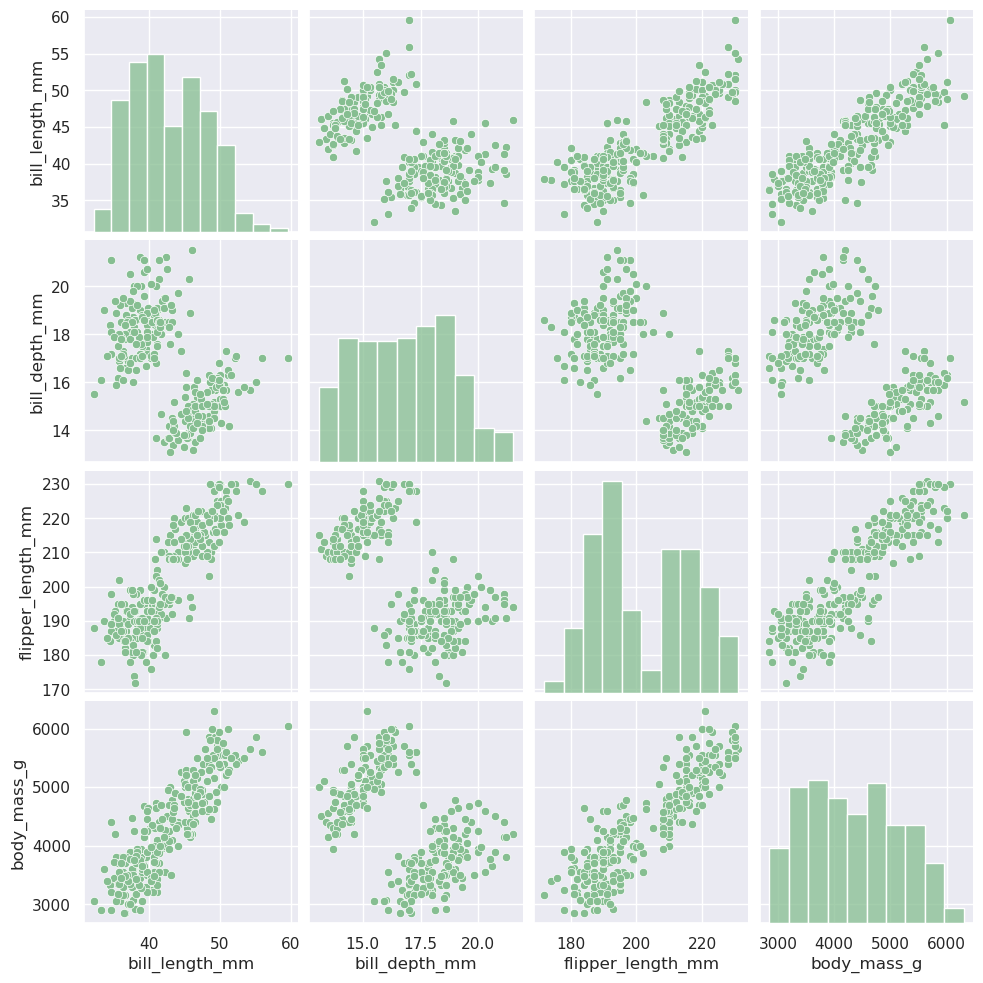

In [39]:
sns.set_palette('crest', 8)
sns.pairplot(df)

### Observed Linear Relationships

- Bill Length and Body Mass
- Bill Length and Flipper Length
- Flipper Length and Body Mass


## Model Construction : Simple Linear Regression

Based on the above observed relationship we can pick any of the 3 relationships. We will begin by exploring relationship between **bill_length_mm** and **body_mass_g**

In [41]:
# Creating subset of the data with the variables of interest from the dataframe
ols_data = df[["bill_length_mm", "body_mass_g"]]
ols_data.head(3)

,bill_length_mm,body_mass_g
0,39.1,3750.0
1,39.5,3800.0
2,40.3,3250.0


Next, construct the linear regression formula, and save it as a string. format is as  **y ~ x**, where *y* is the dpendent variable and *x* is the independent variable

In [42]:
ols_formula = "body_mass_g ~ bill_length_mm"

Build the **simple linear regression model in statsmodels using the ols() function**. You can import the ols() function directly using the line of code below.

In [43]:
# Import ols function from statsmodel 
from statsmodels.formula.api import ols